In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler , PowerTransformer  ,OneHotEncoder ,OrdinalEncoder , FunctionTransformer
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import r2_score


/home/arman/miniconda3/envs/ml100-day/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('csv/car details v4.csv',low_memory=False)
df.isna().mean()*100

Make                  0.000000
Model                 0.000000
Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Location              0.000000
Color                 0.000000
Owner                 0.000000
Seller Type           0.000000
Engine                3.885381
Max Power             3.885381
Max Torque            3.885381
Drivetrain            6.605148
Length                3.108305
Width                 3.108305
Height                3.108305
Seating Capacity      3.108305
Fuel Tank Capacity    5.488101
dtype: float64

In [3]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [4]:
df[df['Price'] > 30000000 ]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
483,Ferrari,488 GTB,35000000,2018,9500,Petrol,Automatic,Delhi,Black,First,Individual,3902 cc,660 bhp @ 8000 rpm,760 Nm @ 3000 rpm,RWD,4568.0,1952.0,1213.0,2.0,78.0


In [5]:
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

In [6]:
df['Drivetrain'].unique() # FWD cars are chepper RWD is middle and AWD are luxery cars 

array(['FWD', 'RWD', 'AWD', nan], dtype=object)

In [7]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [8]:
len(df['Make'].unique())

33

In [9]:
df[(df['Fuel Type'] == 'CNG') & (df['Price']  > 30000000)]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity


In [10]:
df.groupby('Engine')['Price'].max()

Engine
1047 cc     490000
1061 cc     218000
1086 cc     589000
1120 cc     551000
1186 cc     459999
            ...   
814 cc      405000
936 cc      229999
995 cc      190000
998 cc     1325000
999 cc     1625000
Name: Price, Length: 108, dtype: int64

In [11]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [12]:
df['Engine'].unique()

array(['1198 cc', '1248 cc', '1197 cc', '2393 cc', '1373 cc', '1991 cc',
       '1995 cc', '1798 cc', '1461 cc', '999 cc', '1462 cc', '1956 cc',
       '998 cc', '796 cc', '1591 cc', '1086 cc', '1199 cc', '1582 cc',
       nan, '1047 cc', '2143 cc', '1968 cc', '1796 cc', '2498 cc',
       '2494 cc', '2179 cc', '1998 cc', '1497 cc', '1196 cc', '2755 cc',
       '1799 cc', '1493 cc', '1399 cc', '1498 cc', '1997 cc', '1598 cc',
       '2993 cc', '2995 cc', '2982 cc', '1353 cc', '1984 cc', '2967 cc',
       '2609 cc', '1950 cc', '1999 cc', '4663 cc', '1451 cc', '2354 cc',
       '1396 cc', '2987 cc', '2997 cc', '1336 cc', '4163 cc', '3496 cc',
       '799 cc', '2979 cc', '4806 cc', '2996 cc', '1061 cc', '2184 cc',
       '2497 cc', '2999 cc', '1948 cc', '3436 cc', '2925 cc', '2489 cc',
       '1368 cc', '1797 cc', '1298 cc', '2694 cc', '1186 cc', '1364 cc',
       '3498 cc', '3982 cc', '1120 cc', '2523 cc', '1988 cc', '3902 cc',
       '624 cc', '2477 cc', '3198 cc', '5204 cc', '814 cc', '

In [13]:
# df.corr()

In [14]:
df['Engine'] = df['Engine'].str.split(' ').str[0]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [16]:
df['Engine'] = pd.to_numeric(df["Engine"], errors="coerce").astype("Int64")

In [17]:
top_3l = df['Location'].value_counts()
top_3l[top_3l > 100]

Location
Mumbai       342
Delhi        307
Pune         144
Bangalore    132
Hyderabad    116
Name: count, dtype: int64

In [18]:
df['Location']

0             Pune
1         Ludhiana
2          Lucknow
3        Mangalore
4           Mumbai
           ...    
2054         Surat
2055     Ahmedabad
2056         Thane
2057    Coimbatore
2058      Guwahati
Name: Location, Length: 2059, dtype: object

In [19]:
df['Location'].value_counts() > 100

Location
Mumbai               True
Delhi                True
Pune                 True
Bangalore            True
Hyderabad            True
                    ...  
Valsad              False
Rohtak              False
Faizabad            False
Pimpri-Chinchwad    False
Siliguri            False
Name: count, Length: 77, dtype: bool

In [20]:
top_3l > 100

Location
Mumbai               True
Delhi                True
Pune                 True
Bangalore            True
Hyderabad            True
                    ...  
Valsad              False
Rohtak              False
Faizabad            False
Pimpri-Chinchwad    False
Siliguri            False
Name: count, Length: 77, dtype: bool

In [21]:
df['Location']

0             Pune
1         Ludhiana
2          Lucknow
3        Mangalore
4           Mumbai
           ...    
2054         Surat
2055     Ahmedabad
2056         Thane
2057    Coimbatore
2058      Guwahati
Name: Location, Length: 2059, dtype: object

In [22]:
# df['Location'].isin(condition.index)

In [23]:
condition = top_3l[top_3l >100]
df['Location'] = df['Location'].where(df['Location'].isin(condition.index) ,"other")

In [24]:
# df.drop(['Model','Color','Seller Type'],axis=0)

##### BHP(brake Horsepower) = Higher bhp = faster acceleration  EX-> 70 bhp -small car and 120 bhp -> sedan and 300 + bhp -> sports car  

##### How fast the engine is spinning

##### Higher RPM = engine working harder

##### Power is usually written as:

##### 120 BHP @ 6000 RPM
##### nm = pulling force 

In [25]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,other,White,Second,Individual,1248,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,other,Maroon,First,Individual,1197,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,other,Red,First,Individual,1197,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,other,White,First,Individual,2179,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,other,White,Second,Individual,814,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,other,Silver,First,Individual,1196,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,other,White,First,Individual,1995,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [26]:
df['Max Power bhp'] = df['Max Power'].str.split('[ @]').str[0]

In [27]:
df['Max Power rpm'] = df['Max Power'].str.split(' ').str[3]

In [28]:
df['Max Torque Nm'] = df['Max Torque'].str.split('[ @]').str[0]

In [29]:
df['Max Torque Rpm'] = df['Max Torque'].str.split(' ').str[3]

In [30]:
df['Max Torque Rpm'].unique()

array(['4500', '2000', '4000', '4200', '1400', '1200', '1750', '1250',
       '1900', '4250', '4400', '1500', '3500', '4850', '3800', '4800',
       nan, '3000', '1800', '1600', '1350', '4600', '4300', '3750',
       '4100', '2800', '2250', '1340', '1300', '5000', '4386', '3300',
       '2750', '1700', '5600', '2500', '1450', '4700', '2200', '1950',
       '6500', '1850', '1650', '1370', '150', '2150', '2400', '3250',
       '1360', '3600', '3100', '1620'], dtype=object)

In [31]:
df = df.drop(['Model','Color','Seller Type','Max Power','Max Torque','Seating Capacity'],axis=1)

In [32]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Owner,Engine,Drivetrain,Length,Width,Height,Fuel Tank Capacity,Max Power bhp,Max Power rpm,Max Torque Nm,Max Torque Rpm
0,Honda,505000,2017,87150,Petrol,Manual,Pune,First,1198,FWD,3990.0,1680.0,1505.0,35.0,87,6000,109,4500
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,other,Second,1248,FWD,3995.0,1695.0,1555.0,42.0,74,4000,190,2000
2,Hyundai,220000,2011,67000,Petrol,Manual,other,First,1197,FWD,3585.0,1595.0,1550.0,35.0,79,6000,112.7619,4000
3,Toyota,799000,2019,37500,Petrol,Manual,other,First,1197,FWD,3995.0,1745.0,1510.0,37.0,82,6000,113,4200
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,First,2393,RWD,4735.0,1830.0,1795.0,55.0,148,3400,343,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,other,First,2179,FWD,4585.0,1890.0,1785.0,70.0,138,3750,330,1600
2055,Hyundai,275000,2014,83000,Petrol,Manual,other,Second,814,FWD,3495.0,1550.0,1500.0,32.0,55,5500,75,4000
2056,Ford,240000,2013,73000,Petrol,Manual,other,First,1196,FWD,3795.0,1680.0,1427.0,45.0,70,6250,102,4000
2057,BMW,4290000,2018,60474,Diesel,Automatic,other,First,1995,RWD,4936.0,1868.0,1479.0,65.0,188,4000,400,1750


In [33]:
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

In [34]:
df.isna().mean()*100

Make                   0.000000
Price                  0.000000
Year                   0.000000
Kilometer              0.000000
Fuel Type              0.000000
Transmission           0.000000
Location               0.000000
Owner                  0.000000
Engine                 3.885381
Drivetrain             6.605148
Length                 3.108305
Width                  3.108305
Height                 3.108305
Fuel Tank Capacity     5.488101
Max Power bhp          3.885381
Max Power rpm         10.296260
Max Torque Nm          3.885381
Max Torque Rpm        10.101991
dtype: float64

In [35]:
power_torque_fill = ['Max Power bhp','Max Power rpm','Max Torque Nm','Max Torque Rpm']
for cols in power_torque_fill:
    df[cols] = df[cols].fillna(0)

In [36]:
power_torque_datatype = ['Max Power bhp','Max Power rpm','Max Torque Nm','Max Torque Rpm']
for cols in power_torque_datatype:
    df[cols] = df[cols].astype(np.float64)

In [37]:
power_torque_datatype_int = ['Max Power bhp','Max Power rpm','Max Torque Nm','Max Torque Rpm']
for cols in power_torque_datatype_int:
    df[cols] = df[cols].astype(np.int64)

In [38]:
for cols in df[['Max Power bhp','Max Power rpm','Max Torque Nm','Max Torque Rpm']].columns:
    df[cols] = np.where((df[cols] == 0) , np.floor(df[cols].mean()),df[cols])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Price               2059 non-null   int64  
 2   Year                2059 non-null   int64  
 3   Kilometer           2059 non-null   int64  
 4   Fuel Type           2059 non-null   object 
 5   Transmission        2059 non-null   object 
 6   Location            2059 non-null   object 
 7   Owner               2059 non-null   object 
 8   Engine              1979 non-null   Int64  
 9   Drivetrain          1923 non-null   object 
 10  Length              1995 non-null   float64
 11  Width               1995 non-null   float64
 12  Height              1995 non-null   float64
 13  Fuel Tank Capacity  1946 non-null   float64
 14  Max Power bhp       2059 non-null   float64
 15  Max Power rpm       2059 non-null   float64
 16  Max To

In [40]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Owner,Engine,Drivetrain,Length,Width,Height,Fuel Tank Capacity,Max Power bhp,Max Power rpm,Max Torque Nm,Max Torque Rpm
0,Honda,505000,2017,87150,Petrol,Manual,Pune,First,1198,FWD,3990.0,1680.0,1505.0,35.0,87.0,6000.0,109.0,4500.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,other,Second,1248,FWD,3995.0,1695.0,1555.0,42.0,74.0,4000.0,190.0,2000.0
2,Hyundai,220000,2011,67000,Petrol,Manual,other,First,1197,FWD,3585.0,1595.0,1550.0,35.0,79.0,6000.0,112.0,4000.0
3,Toyota,799000,2019,37500,Petrol,Manual,other,First,1197,FWD,3995.0,1745.0,1510.0,37.0,82.0,6000.0,113.0,4200.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,First,2393,RWD,4735.0,1830.0,1795.0,55.0,148.0,3400.0,343.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,other,First,2179,FWD,4585.0,1890.0,1785.0,70.0,138.0,3750.0,330.0,1600.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,other,Second,814,FWD,3495.0,1550.0,1500.0,32.0,55.0,5500.0,75.0,4000.0
2056,Ford,240000,2013,73000,Petrol,Manual,other,First,1196,FWD,3795.0,1680.0,1427.0,45.0,70.0,6250.0,102.0,4000.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,other,First,1995,RWD,4936.0,1868.0,1479.0,65.0,188.0,4000.0,400.0,1750.0


In [41]:
df.isna().mean()*100

Make                  0.000000
Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Location              0.000000
Owner                 0.000000
Engine                3.885381
Drivetrain            6.605148
Length                3.108305
Width                 3.108305
Height                3.108305
Fuel Tank Capacity    5.488101
Max Power bhp         0.000000
Max Power rpm         0.000000
Max Torque Nm         0.000000
Max Torque Rpm        0.000000
dtype: float64

In [42]:
# Garbage column  = Location , owner type ,Height ,Fuel type

In [43]:
df['Make'].unique()

array(['Honda', 'Maruti Suzuki', 'Hyundai', 'Toyota', 'Mercedes-Benz',
       'BMW', 'Skoda', 'Nissan', 'Renault', 'Tata', 'Volkswagen', 'Ford',
       'Audi', 'Mahindra', 'MG', 'Jeep', 'Porsche', 'Kia', 'Land Rover',
       'Volvo', 'Maserati', 'Jaguar', 'Isuzu', 'Fiat', 'MINI', 'Ferrari',
       'Mitsubishi', 'Datsun', 'Lamborghini', 'Chevrolet', 'Ssangyong',
       'Rolls-Royce', 'Lexus'], dtype=object)

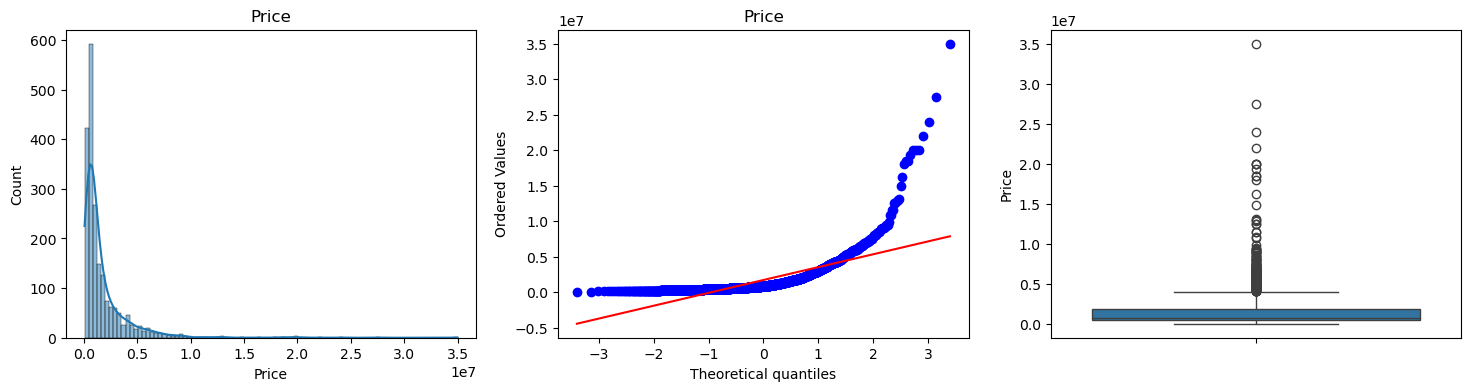

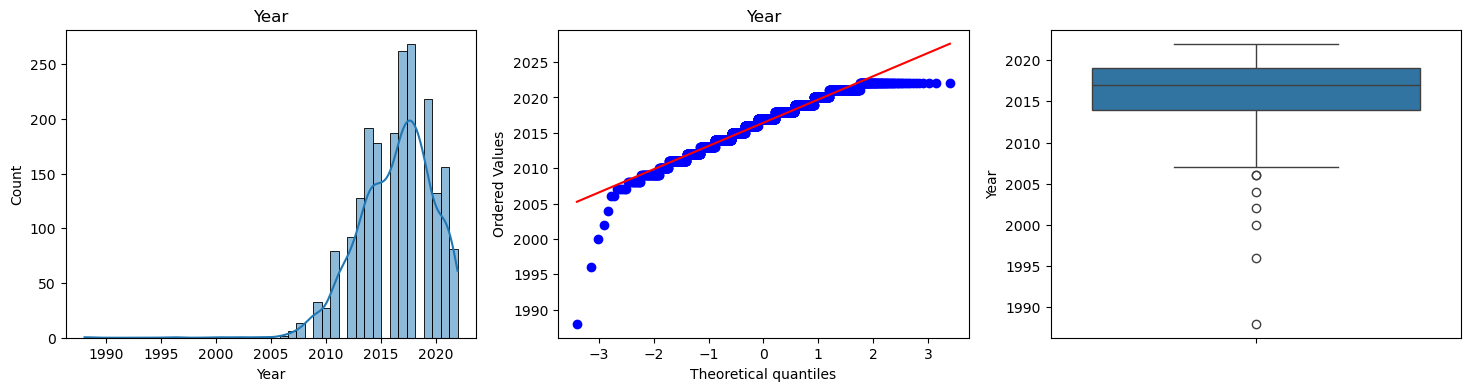

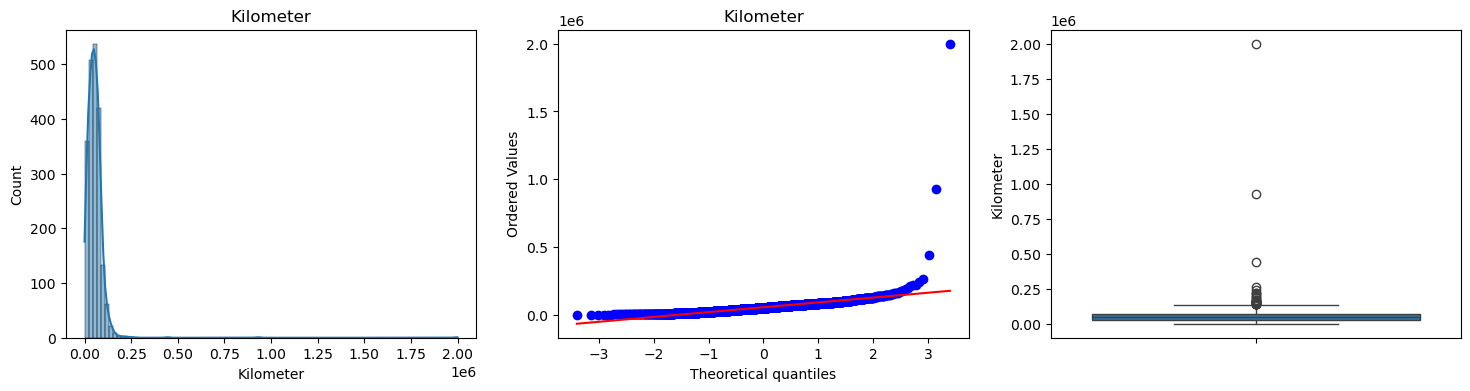

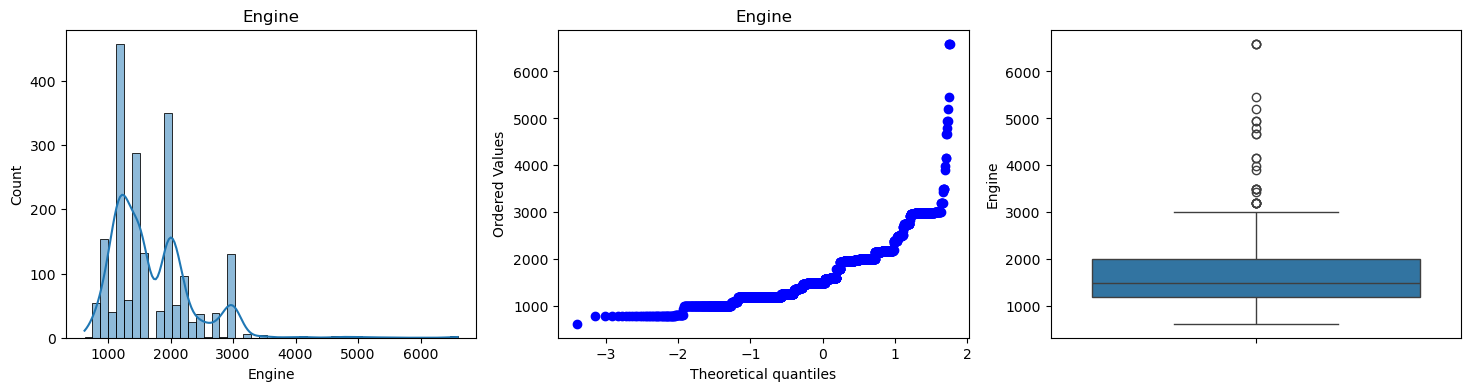

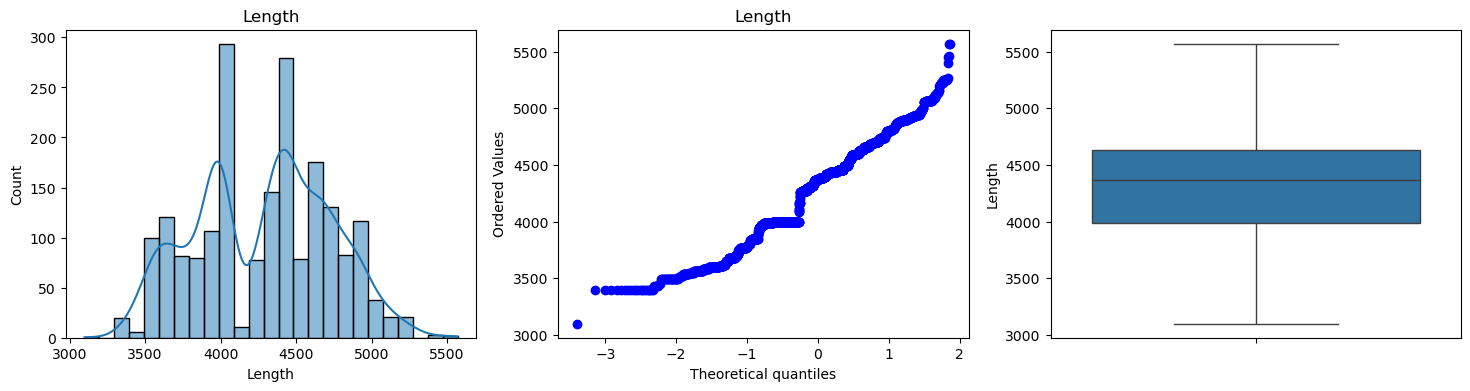

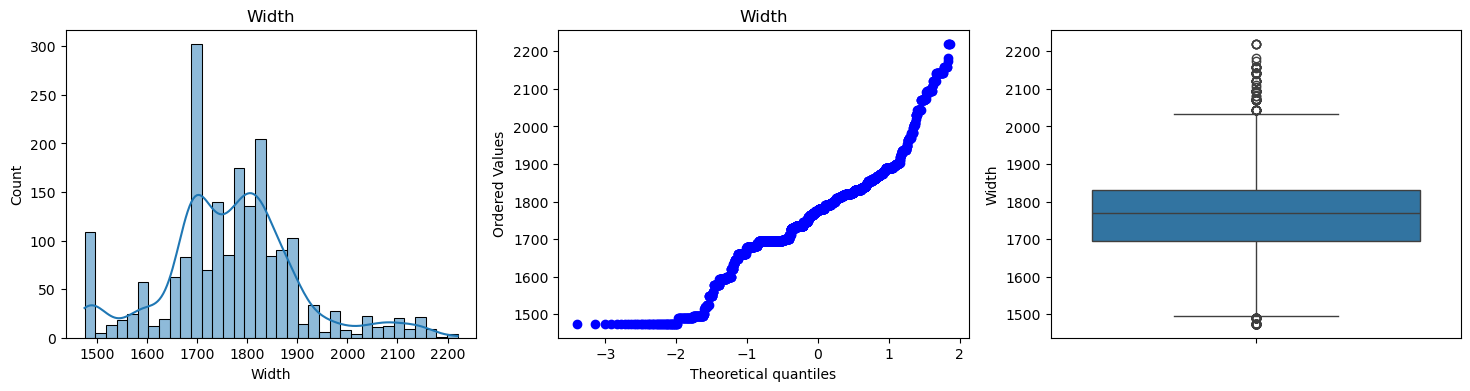

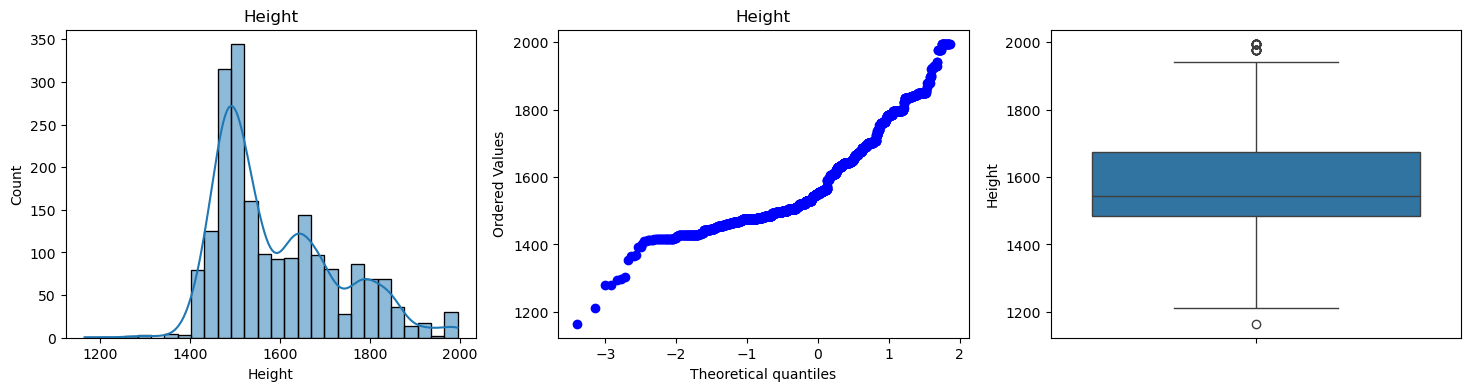

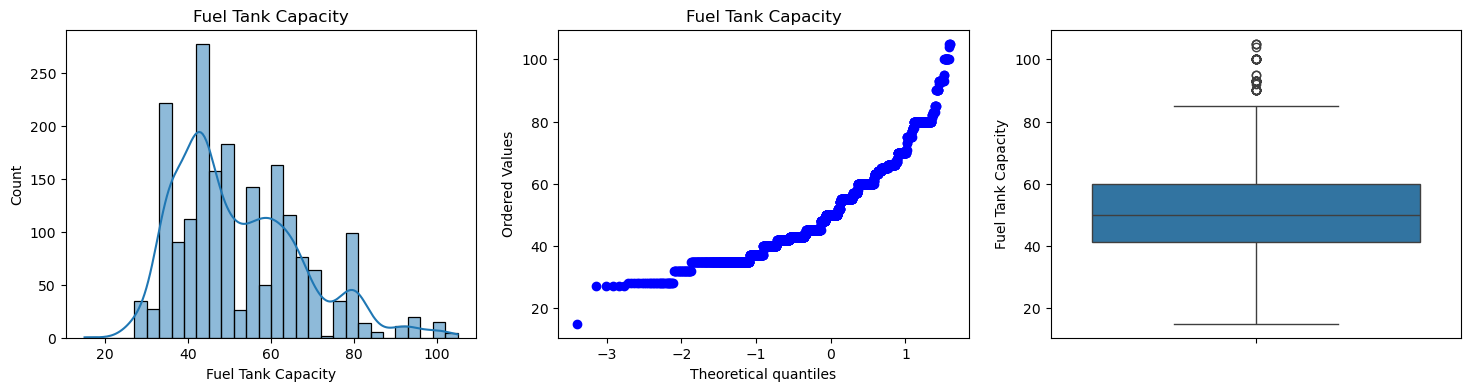

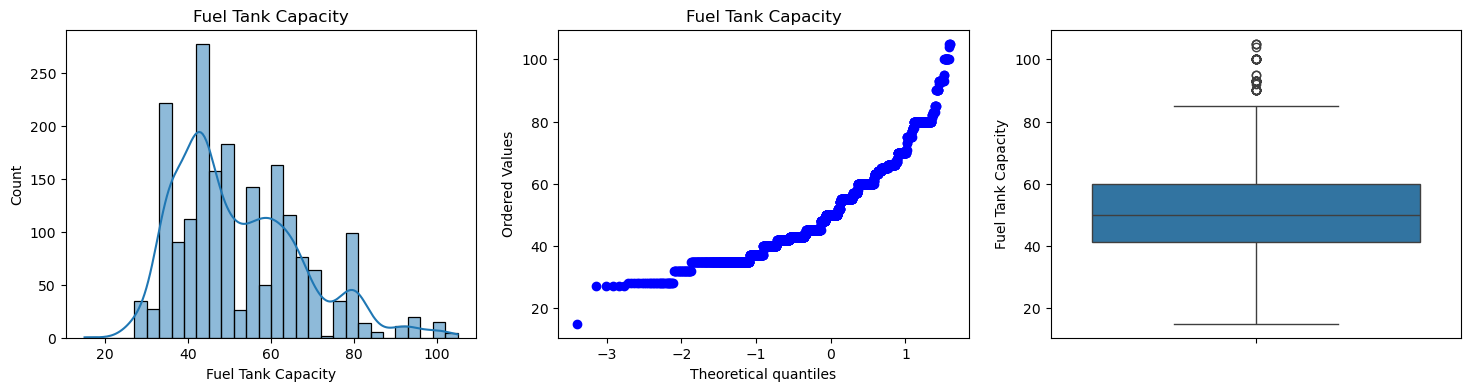

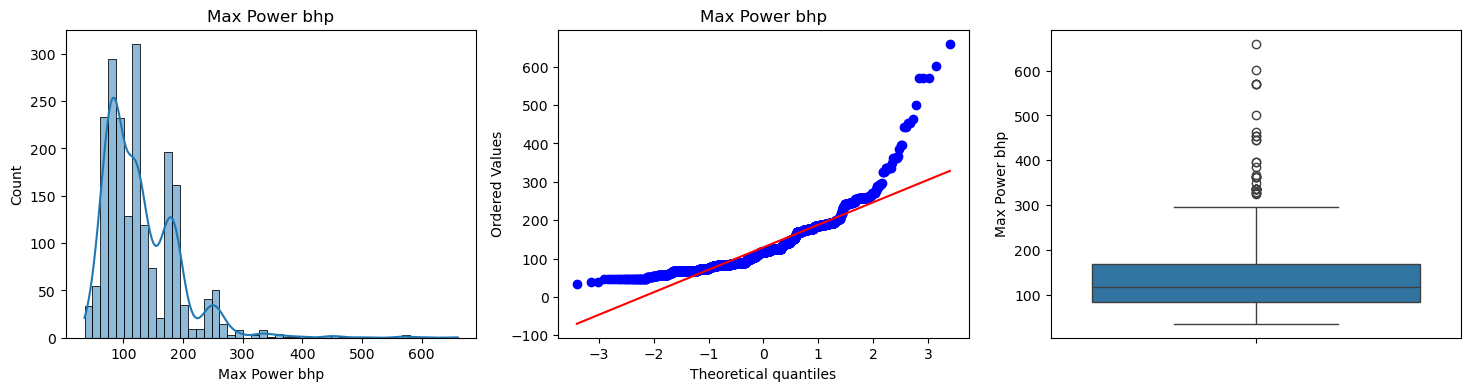

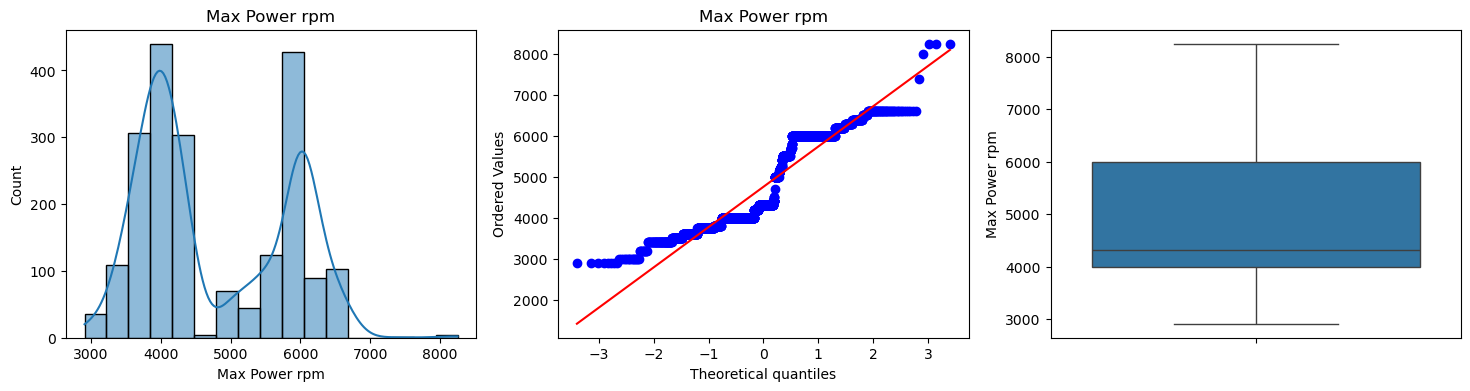

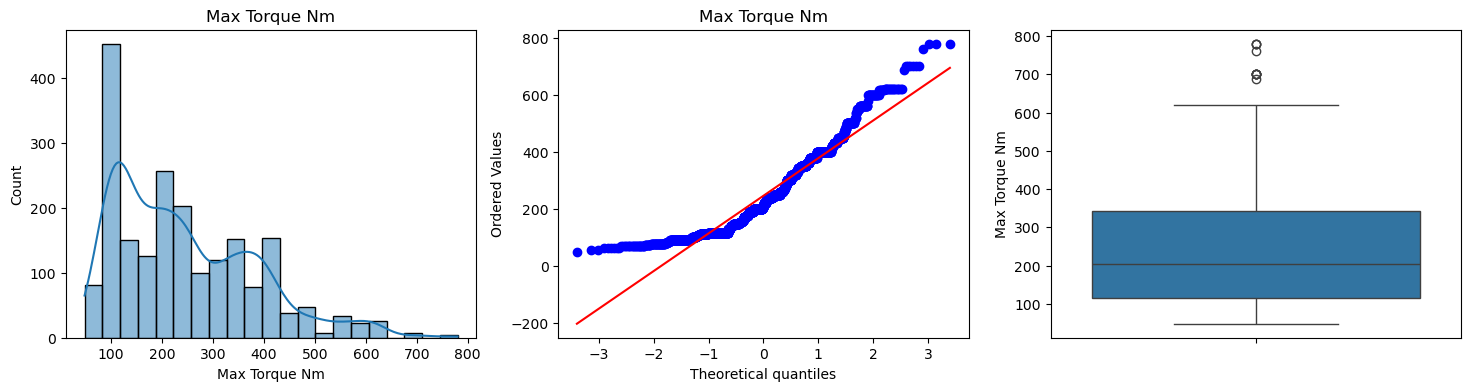

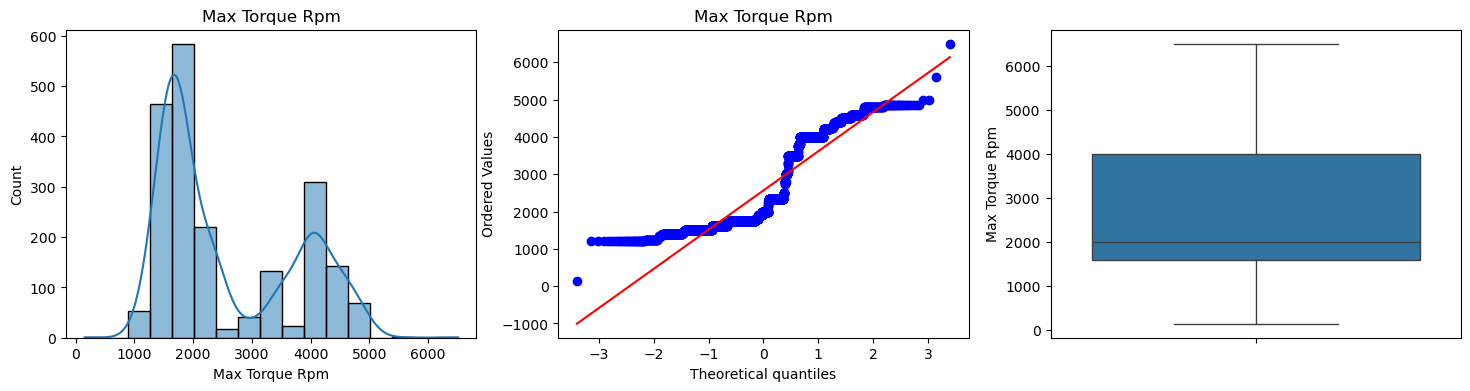

In [45]:
for cols in df[['Price','Year','Kilometer','Engine',
                'Length','Width','Height','Fuel Tank Capacity',
                'Fuel Tank Capacity','Max Power bhp','Max Power rpm','Max Torque Nm','Max Torque Rpm']].columns:
    plt.figure(figsize=(18,4))
    
    plt.subplot(131)
    sns.histplot(df[cols],kde=True)
    plt.title(f"{cols}")
    
    plt.subplot(132)
    stats.probplot(df[cols],plot=plt)
    plt.title(f"{cols}")
    
    plt.subplot(133)
    sns.boxplot(df[cols])
    
    plt.show

In [46]:
df.groupby('Make')['Price'].max()

Make
Audi              9900000
BMW              12500000
Chevrolet          475000
Datsun             425000
Ferrari          35000000
Fiat               375000
Ford              8000000
Honda             1700000
Hyundai           2400000
Isuzu             2100000
Jaguar            5800000
Jeep              6100000
Kia               2950000
Lamborghini      24000000
Land Rover       27500000
Lexus             5200000
MG                3950000
MINI              5200000
Mahindra          2770000
Maruti Suzuki     1299000
Maserati          9000000
Mercedes-Benz    20000000
Mitsubishi        1995000
Nissan             650000
Porsche          16200000
Renault           1000000
Rolls-Royce      20000000
Skoda             3499000
Ssangyong          975000
Tata              2395000
Toyota           11500000
Volkswagen        3375000
Volvo             8500000
Name: Price, dtype: int64

In [47]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Owner,Engine,Drivetrain,Length,Width,Height,Fuel Tank Capacity,Max Power bhp,Max Power rpm,Max Torque Nm,Max Torque Rpm
0,Honda,505000,2017,87150,Petrol,Manual,Pune,First,1198,FWD,3990.0,1680.0,1505.0,35.0,87.0,6000.0,109.0,4500.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,other,Second,1248,FWD,3995.0,1695.0,1555.0,42.0,74.0,4000.0,190.0,2000.0
2,Hyundai,220000,2011,67000,Petrol,Manual,other,First,1197,FWD,3585.0,1595.0,1550.0,35.0,79.0,6000.0,112.0,4000.0
3,Toyota,799000,2019,37500,Petrol,Manual,other,First,1197,FWD,3995.0,1745.0,1510.0,37.0,82.0,6000.0,113.0,4200.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,First,2393,RWD,4735.0,1830.0,1795.0,55.0,148.0,3400.0,343.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,other,First,2179,FWD,4585.0,1890.0,1785.0,70.0,138.0,3750.0,330.0,1600.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,other,Second,814,FWD,3495.0,1550.0,1500.0,32.0,55.0,5500.0,75.0,4000.0
2056,Ford,240000,2013,73000,Petrol,Manual,other,First,1196,FWD,3795.0,1680.0,1427.0,45.0,70.0,6250.0,102.0,4000.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,other,First,1995,RWD,4936.0,1868.0,1479.0,65.0,188.0,4000.0,400.0,1750.0


In [48]:
df = df.drop('Location',axis=1)

In [49]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Engine,Drivetrain,Length,Width,Height,Fuel Tank Capacity,Max Power bhp,Max Power rpm,Max Torque Nm,Max Torque Rpm
0,Honda,505000,2017,87150,Petrol,Manual,First,1198,FWD,3990.0,1680.0,1505.0,35.0,87.0,6000.0,109.0,4500.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Second,1248,FWD,3995.0,1695.0,1555.0,42.0,74.0,4000.0,190.0,2000.0
2,Hyundai,220000,2011,67000,Petrol,Manual,First,1197,FWD,3585.0,1595.0,1550.0,35.0,79.0,6000.0,112.0,4000.0
3,Toyota,799000,2019,37500,Petrol,Manual,First,1197,FWD,3995.0,1745.0,1510.0,37.0,82.0,6000.0,113.0,4200.0
4,Toyota,1950000,2018,69000,Diesel,Manual,First,2393,RWD,4735.0,1830.0,1795.0,55.0,148.0,3400.0,343.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,First,2179,FWD,4585.0,1890.0,1785.0,70.0,138.0,3750.0,330.0,1600.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Second,814,FWD,3495.0,1550.0,1500.0,32.0,55.0,5500.0,75.0,4000.0
2056,Ford,240000,2013,73000,Petrol,Manual,First,1196,FWD,3795.0,1680.0,1427.0,45.0,70.0,6250.0,102.0,4000.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,First,1995,RWD,4936.0,1868.0,1479.0,65.0,188.0,4000.0,400.0,1750.0


In [50]:
len(df['Make'].unique())

33

In [51]:
df['Car_age'] = 2023 - df['Year']

In [52]:
# df.drop('Year',axis=1,inplace=True)

In [53]:
np.floor(df.groupby('Make')['Price'].mean().sort_values(ascending=False))

Make
Ferrari          35000000.0
Lamborghini      24000000.0
Rolls-Royce      19333333.0
Maserati          9000000.0
Porsche           8342666.0
Land Rover        6699333.0
Mercedes-Benz     4384859.0
Lexus             4125000.0
BMW               3768966.0
Jaguar            3564647.0
Volvo             3090874.0
MINI              3054909.0
Audi              2703133.0
MG                2024117.0
Jeep              1956888.0
Isuzu             1945500.0
Toyota            1729545.0
Kia               1569913.0
Skoda             1498224.0
Ford              1474624.0
Mitsubishi        1348750.0
Mahindra          1083478.0
Tata               990736.0
Ssangyong          850000.0
Hyundai            723263.0
Volkswagen         707459.0
Honda              622107.0
Maruti Suzuki      534799.0
Nissan             482187.0
Renault            469581.0
Chevrolet          341285.0
Fiat               305000.0
Datsun             297875.0
Name: Price, dtype: float64

In [54]:
# luxery = 35lakhs to 3.5 cr , Mid-range = 12 lakhs to 35 lakhs , Budget brands =  2 lakhs to 12 lakhs 
def brand(x):
    if x >= 200000 and x <= 1000000:
        return 'Budget Cars'
    elif x >= 1000000 and x <= 2000000:
        return 'Mid-range cars'
    else :
        return " Luxury cars" 
df['Brand'] = df['Price'].apply(brand)
        

In [55]:
df[['Make',"Brand"]]

,Make,Brand
0,Honda,Budget Cars
1,Maruti Suzuki,Budget Cars
2,Hyundai,Budget Cars
3,Toyota,Budget Cars
4,Toyota,Mid-range cars
...,...,...
2054,Mahindra,Budget Cars
2055,Hyundai,Budget Cars
2056,Ford,Budget Cars
2057,BMW,Luxury cars


In [56]:
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   4%|▍         | 1/24 [00:00<00:03,  6.45it/s, Describe variable: Engine]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 38.47it/s]


In [57]:
df.shape

(2059, 19)

In [58]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Engine,Drivetrain,Length,Width,Height,Fuel Tank Capacity,Max Power bhp,Max Power rpm,Max Torque Nm,Max Torque Rpm,Car_age,Brand
0,Honda,505000,2017,87150,Petrol,Manual,First,1198,FWD,3990.0,1680.0,1505.0,35.0,87.0,6000.0,109.0,4500.0,6,Budget Cars
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Second,1248,FWD,3995.0,1695.0,1555.0,42.0,74.0,4000.0,190.0,2000.0,9,Budget Cars
2,Hyundai,220000,2011,67000,Petrol,Manual,First,1197,FWD,3585.0,1595.0,1550.0,35.0,79.0,6000.0,112.0,4000.0,12,Budget Cars
3,Toyota,799000,2019,37500,Petrol,Manual,First,1197,FWD,3995.0,1745.0,1510.0,37.0,82.0,6000.0,113.0,4200.0,4,Budget Cars
4,Toyota,1950000,2018,69000,Diesel,Manual,First,2393,RWD,4735.0,1830.0,1795.0,55.0,148.0,3400.0,343.0,1400.0,5,Mid-range cars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,First,2179,FWD,4585.0,1890.0,1785.0,70.0,138.0,3750.0,330.0,1600.0,7,Budget Cars
2055,Hyundai,275000,2014,83000,Petrol,Manual,Second,814,FWD,3495.0,1550.0,1500.0,32.0,55.0,5500.0,75.0,4000.0,9,Budget Cars
2056,Ford,240000,2013,73000,Petrol,Manual,First,1196,FWD,3795.0,1680.0,1427.0,45.0,70.0,6250.0,102.0,4000.0,10,Budget Cars
2057,BMW,4290000,2018,60474,Diesel,Automatic,First,1995,RWD,4936.0,1868.0,1479.0,65.0,188.0,4000.0,400.0,1750.0,5,Luxury cars


In [59]:
len(df['Make'].unique())

33

In [60]:
df  = df.drop(['Owner','Year','Brand'],axis=1)

In [61]:
df

,Make,Price,Kilometer,Fuel Type,Transmission,Engine,Drivetrain,Length,Width,Height,Fuel Tank Capacity,Max Power bhp,Max Power rpm,Max Torque Nm,Max Torque Rpm,Car_age
0,Honda,505000,87150,Petrol,Manual,1198,FWD,3990.0,1680.0,1505.0,35.0,87.0,6000.0,109.0,4500.0,6
1,Maruti Suzuki,450000,75000,Diesel,Manual,1248,FWD,3995.0,1695.0,1555.0,42.0,74.0,4000.0,190.0,2000.0,9
2,Hyundai,220000,67000,Petrol,Manual,1197,FWD,3585.0,1595.0,1550.0,35.0,79.0,6000.0,112.0,4000.0,12
3,Toyota,799000,37500,Petrol,Manual,1197,FWD,3995.0,1745.0,1510.0,37.0,82.0,6000.0,113.0,4200.0,4
4,Toyota,1950000,69000,Diesel,Manual,2393,RWD,4735.0,1830.0,1795.0,55.0,148.0,3400.0,343.0,1400.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,90300,Diesel,Manual,2179,FWD,4585.0,1890.0,1785.0,70.0,138.0,3750.0,330.0,1600.0,7
2055,Hyundai,275000,83000,Petrol,Manual,814,FWD,3495.0,1550.0,1500.0,32.0,55.0,5500.0,75.0,4000.0,9
2056,Ford,240000,73000,Petrol,Manual,1196,FWD,3795.0,1680.0,1427.0,45.0,70.0,6250.0,102.0,4000.0,10
2057,BMW,4290000,60474,Diesel,Automatic,1995,RWD,4936.0,1868.0,1479.0,65.0,188.0,4000.0,400.0,1750.0,5


In [62]:
# df['Owner'] = np.where(
#     (df['Owner'] == "UnRegistered Car") | (df['Owner'] == '4 or More') | (df['Owner'] == 'Fourth'),
#     'other',
#     df['Owner']
#     )

In [63]:
# df['Owner'].unique()

In [64]:
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric', 'CNG + CNG',
       'Hybrid', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [65]:
fuel_data = ['LPG', 'Electric', 'CNG + CNG',
       'Hybrid', 'Petrol + CNG', 'Petrol + LPG']
for fd in fuel_data:
    df['Fuel Type'] = np.where((df['Fuel Type'] == f'{fd}'),'other',df['Fuel Type'])

In [66]:
# data = 'Electric'
# df['Fuel Type'] = np.where((df['Fuel Type'] == f'{data}'),'other',df['Fuel Type'])

In [67]:
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'other'], dtype=object)

In [74]:
df

,Make,Price,Kilometer,Fuel Type,Transmission,Engine,Drivetrain,Length,Width,Height,Fuel Tank Capacity,Max Power bhp,Max Power rpm,Max Torque Nm,Max Torque Rpm,Car_age
0,Honda,505000,87150,Petrol,Manual,1198,FWD,3990.0,1680.0,1505.0,35.0,87.0,6000.0,109.0,4500.0,6
1,Maruti Suzuki,450000,75000,Diesel,Manual,1248,FWD,3995.0,1695.0,1555.0,42.0,74.0,4000.0,190.0,2000.0,9
2,Hyundai,220000,67000,Petrol,Manual,1197,FWD,3585.0,1595.0,1550.0,35.0,79.0,6000.0,112.0,4000.0,12
3,Toyota,799000,37500,Petrol,Manual,1197,FWD,3995.0,1745.0,1510.0,37.0,82.0,6000.0,113.0,4200.0,4
4,Toyota,1950000,69000,Diesel,Manual,2393,RWD,4735.0,1830.0,1795.0,55.0,148.0,3400.0,343.0,1400.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,90300,Diesel,Manual,2179,FWD,4585.0,1890.0,1785.0,70.0,138.0,3750.0,330.0,1600.0,7
2055,Hyundai,275000,83000,Petrol,Manual,814,FWD,3495.0,1550.0,1500.0,32.0,55.0,5500.0,75.0,4000.0,9
2056,Ford,240000,73000,Petrol,Manual,1196,FWD,3795.0,1680.0,1427.0,45.0,70.0,6250.0,102.0,4000.0,10
2057,BMW,4290000,60474,Diesel,Automatic,1995,RWD,4936.0,1868.0,1479.0,65.0,188.0,4000.0,400.0,1750.0,5


In [69]:
x = df.drop('Price',axis=1)
y = df['Price']

In [70]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2,random_state=42)
x_train.shape

(1647, 15)

In [75]:
df['Drivetrain'].unique()

array(['FWD', 'RWD', 'AWD', nan], dtype=object)

In [76]:
x_train.columns

Index(['Make', 'Kilometer', 'Fuel Type', 'Transmission', 'Engine',
       'Drivetrain', 'Length', 'Width', 'Height', 'Fuel Tank Capacity',
       'Max Power bhp', 'Max Power rpm', 'Max Torque Nm', 'Max Torque Rpm',
       'Car_age'],
      dtype='object')

In [77]:
Target_encoding_col = ['Make']
cat_col = [
    'Fuel Type',
    'Drivetrain',
    'Transmission'
    ]
num_column = [
    'Kilometer',
    'Engine',
    'Length',
    'Width',
    'Height',
    'Fuel Tank Capacity',
    'Max Power bhp',
    'Max Power rpm',
    'Max Torque Nm',
    'Max Torque Rpm',
    'Car_age'
              ]

In [78]:
#Categorical  Pipelines 
te_pip_make = Pipeline(
    [
        ('Missing_data',SimpleImputer(strategy='most_frequent')),
        ('Te_Encoding',TargetEncoder())
    ]
)
cat_pip = Pipeline(
    [
        ('Missing_data',SimpleImputer(strategy='most_frequent')),
        ('Ohe_Encoding',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'))
    ]
    )

In [89]:
# Numercial Pipelines
num_pip = Pipeline([
    ('Missing_data_num', SimpleImputer(strategy='mean')),
    ('Scaling', RobustScaler()),
    ('PCA',PCA(n_components=10, random_state=42))
]) 

In [90]:
preprocessing = ColumnTransformer(transformers=[
    ('cat-make-te',te_pip_make , Target_encoding_col),
    ('cat-data',cat_pip,cat_col),
    ('Num_data',num_pip , num_column)
])

In [91]:
pip = Pipeline([
    ('preprocessing',preprocessing),
    ('model',LinearRegression())
])

In [92]:
y_train_log = np.log1p(y_train)


In [93]:
pip.fit(x_train,y_train_log)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat-make-te', ...), ('cat-data', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the differ

In [94]:
y_pred_log = pip.predict(x_test)

In [95]:
y_pred = np.expm1(y_pred_log)

In [96]:
r2_score(y_test,y_pred)

0.7738610985296005

In [97]:
# i need to tarnsformer data y_tarin and y_test 
prd_y = pd.DataFrame(y_pred , columns=['price'])
prd_y

,price
0,5.045541e+06
1,6.658135e+05
2,4.626587e+05
3,1.231789e+06
4,5.702839e+05
...,...
407,3.700341e+05
408,1.698006e+06
409,1.154690e+06
410,3.182933e+05


In [98]:
y_test

1298    4800000
591      825000
1318     695000
1067     950000
29       819999
         ...   
1033     275000
674     1550000
1771    5590000
322      325000
1299     785000
Name: Price, Length: 412, dtype: int64